# WeatherPy
----

#### Observable Trends
* Looking at the plot that show the latitude vs temperature, there is a clear correlation that as we move up towards the equator (or away) from the equator, points are bundled more to the right (at 0), which corresponds to a higher temperature. It is clearly shown when the temperature plots are broken into two the northern and southern hemisphere. The northern hemisphere plot shows that as the latitude approaches 0, temperatures rise (negative correlation, as latitude decrease, there is an increase in temperature). Similarly, in the southern hemisphere, temperature rises as the latitude becomes less negative and approaches 0 (positive correlation, as latitude increases to 0, there is an increase in temperature). All of these plots have an a strong (|correlation| > 60)
* The other weather factors, such as cloudiness or wind speed, does not seem to be as strongly correlated with latitude r < 40.
* To my surprise, I expected humidity to be correlated with latitude but that does not seem to be the case as the correlation coefficient is low for all the plots r < 40.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []

for index, city in enumerate(cities):
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial')
    if response.status_code == 200:
        print(f"Processing request {index}: {city} weather data found!")
        city_dict = {"City": response.json()['name'],
             "Cloudiness": int(response.json()['clouds']['all']),
             "Country": response.json()['sys']['country'],
             "Date": response.json()['dt'],
             "Humidity": int(response.json()['main']['humidity']),
             "Lat": int(response.json()['coord']['lat']),
             "Lng": int(response.json()['coord']['lon']),
             "Max Temp": int(response.json()['main']['temp_max']),
             "Wind Speed": int(response.json()['wind']['speed'])
            }
        city_data.append(city_dict)
    elif response.status_code == 404:
        print(f"{city} weather data not found! Moving on to the next city")
    time.sleep(.25)

Processing request 0: port elizabeth weather data found!
Processing request 1: bereznik weather data found!
Processing request 2: chipinge weather data found!
grand river south east weather data not found! Moving on to the next city
Processing request 4: kodiak weather data found!
barentsburg weather data not found! Moving on to the next city
Processing request 6: korcula weather data found!
Processing request 7: carnaiba weather data found!
Processing request 8: thompson weather data found!
Processing request 9: luderitz weather data found!
Processing request 10: cape town weather data found!
Processing request 11: hermanus weather data found!
Processing request 12: kaitangata weather data found!
sentyabrskiy weather data not found! Moving on to the next city
Processing request 14: kaoma weather data found!
Processing request 15: ushuaia weather data found!
Processing request 16: bredasdorp weather data found!
Processing request 17: nikolskoye weather data found!
fort saint john weath

Processing request 154: buta weather data found!
saleaula weather data not found! Moving on to the next city
amderma weather data not found! Moving on to the next city
Processing request 157: talnakh weather data found!
Processing request 158: cidreira weather data found!
Processing request 159: edd weather data found!
Processing request 160: namatanai weather data found!
Processing request 161: husavik weather data found!
Processing request 162: touros weather data found!
Processing request 163: rio grande weather data found!
Processing request 164: georgetown weather data found!
ahumada weather data not found! Moving on to the next city
Processing request 166: tuktoyaktuk weather data found!
utiroa weather data not found! Moving on to the next city
zlatoustovsk weather data not found! Moving on to the next city
Processing request 169: teeli weather data found!
Processing request 170: aligudarz weather data found!
Processing request 171: egvekinot weather data found!
vaitupu weather d

Processing request 306: tual weather data found!
palabuhanratu weather data not found! Moving on to the next city
Processing request 308: vila franca do campo weather data found!
Processing request 309: constanta weather data found!
Processing request 310: moose factory weather data found!
nizhneyansk weather data not found! Moving on to the next city
Processing request 312: xique-xique weather data found!
Processing request 313: kawalu weather data found!
Processing request 314: obregon weather data found!
Processing request 315: dumbea weather data found!
Processing request 316: fort-shevchenko weather data found!
Processing request 317: port moresby weather data found!
Processing request 318: buin weather data found!
Processing request 319: vila weather data found!
Processing request 320: apricena weather data found!
Processing request 321: bambous virieux weather data found!
Processing request 322: longyearbyen weather data found!
Processing request 323: auki weather data found!
Pr

Processing request 458: nalut weather data found!
Processing request 459: nelson bay weather data found!
Processing request 460: nanortalik weather data found!
Processing request 461: pisco weather data found!
Processing request 462: bogorodskoye weather data found!
Processing request 463: puerto escondido weather data found!
Processing request 464: carbonia weather data found!
Processing request 465: marang weather data found!
Processing request 466: bac lieu weather data found!
Processing request 467: erzin weather data found!
Processing request 468: lanzhou weather data found!
Processing request 469: shatoy weather data found!
Processing request 470: rawson weather data found!
Processing request 471: iralaya weather data found!
Processing request 472: aswan weather data found!
Processing request 473: mogzon weather data found!
Processing request 474: chingirlau weather data found!
Processing request 475: song phi nong weather data found!
Processing request 476: ucluelet weather data

Processing request 612: huixtla weather data found!
Processing request 613: kirovskiy weather data found!
Processing request 614: santo domingo weather data found!
Processing request 615: camapua weather data found!
Processing request 616: quatre cocos weather data found!
Processing request 617: boueni weather data found!
Processing request 618: buenos aires weather data found!
Processing request 619: lompoc weather data found!
Processing request 620: port hawkesbury weather data found!
Processing request 621: shenzhen weather data found!
Processing request 622: anloga weather data found!
Processing request 623: camana weather data found!
Processing request 624: mogadishu weather data found!
Processing request 625: yar-sale weather data found!
Processing request 626: damghan weather data found!
Processing request 627: lesnoy weather data found!
Processing request 628: bay roberts weather data found!
Processing request 629: aksu weather data found!
Processing request 630: dno weather da

In [4]:
len(city_data)

582

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
#export data into a csv
#pd.DataFrame(city_data).to_csv("City_Weather_data.csv", index = False) 

city_weather_df = pd.read_csv("output_data/City_Weather_data.csv")

#Convert numeric data into integers
city_weather_df.rename(columns={'Max Temp': 'Max Temp (F)',
                          'Wind Speed': 'Wind Speed (mph)'}, inplace = True)
city_weather_df[['Cloudiness', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp (F)', 'Wind Speed (mph)']].astype(float)

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)
0,20.0,1.635601e+09,64.0,-33.0,25.0,75.0,20.0
1,100.0,1.635601e+09,100.0,62.0,42.0,38.0,3.0
2,0.0,1.635601e+09,21.0,-20.0,32.0,88.0,3.0
3,100.0,1.635601e+09,95.0,57.0,-152.0,44.0,29.0
4,0.0,1.635601e+09,51.0,42.0,17.0,70.0,3.0
...,...,...,...,...,...,...,...
577,2.0,1.635601e+09,57.0,53.0,-106.0,25.0,9.0
578,1.0,1.635601e+09,93.0,50.0,-127.0,42.0,4.0
579,32.0,1.635601e+09,65.0,50.0,97.0,29.0,2.0
580,8.0,1.635601e+09,34.0,51.0,-58.0,47.0,3.0


In [4]:
city_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)
count,582.000000,5.820000e+02,582.000000,582.000000,582.000000,582.000000,582.000000
mean,56.202749,1.635601e+09,69.597938,18.936426,20.792096,61.865979,7.281787
std,40.487351,1.200803e+02,21.193637,31.829111,88.860639,22.311499,5.232920
min,0.000000,1.635600e+09,8.000000,-54.000000,-179.000000,-10.000000,0.000000
25%,9.000000,1.635601e+09,57.250000,-6.000000,-56.000000,49.000000,3.000000
50%,72.500000,1.635601e+09,74.000000,22.000000,24.000000,67.000000,6.000000
75%,99.000000,1.635601e+09,86.000000,45.000000,97.000000,79.750000,10.000000
max,100.000000,1.635601e+09,100.000000,78.000000,179.000000,103.000000,29.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
city_weather_df.loc[city_weather_df["Humidity"] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.copy(deep = True)

In [8]:
#define function for finding linear regression
def my_linear_regression(x_data, y_data, x_annotate, y_annotate):                  
    correlation = linregress(x_data, y_data)
    line_eq = "y = " + str(round(correlation[0], 2)) + "x + " + str(round(correlation[1], 2))
    plt.annotate(line_eq, (x_annotate,y_annotate), fontsize = 12, color = 'red')
    EoL_fit = correlation[0] * x_data + correlation[1]
    plt.plot(x_data, EoL_fit, color = 'r', linestyle = '-', lw = .75, label='Linear regression')
    plt.legend(loc='best')
    print(f"The correlation between both factors is {round(correlation[2],2)}")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The correlation between both factors is -0.62


Text(0, 0.5, 'Latitude')

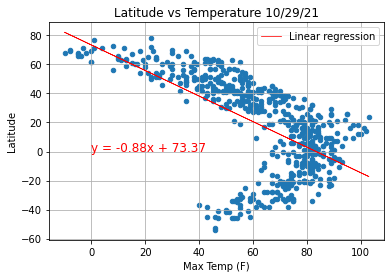

In [32]:
clean_city_data.plot(kind = "scatter",                                               
                    x = 'Max Temp (F)',
                    y = "Lat",
                    grid = True,
                    title = "Latitude vs Temperature 10/29/21"
                   )

my_linear_regression(clean_city_data['Max Temp (F)'], clean_city_data['Lat'], 0, 0)
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')

## Latitude vs. Humidity Plot

The correlation between both factors is 0.21


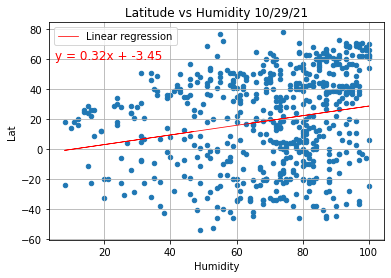

In [16]:
clean_city_data.plot(kind = "scatter",                                               
                    x = 'Humidity',
                    y = "Lat",
                    grid = True,
                    title = "Latitude vs Humidity 10/29/21"
                   )

my_linear_regression(clean_city_data['Humidity'], clean_city_data['Lat'], 5, 60)
plt.savefig('output_data/Latitude_vs_Humidity_regress.png')

## Latitude vs. Cloudiness Plot

The correlation between both factors is 0.15


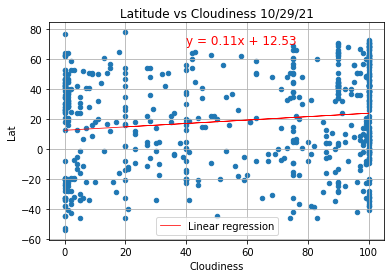

In [17]:
clean_city_data.plot(kind = "scatter",                                               
                    x = 'Cloudiness',
                    y = "Lat",
                    grid = True,
                    title = "Latitude vs Cloudiness 10/29/21"
                   )

my_linear_regression(clean_city_data['Cloudiness'], clean_city_data['Lat'], 40, 70)
plt.savefig('output_data/Latitude_vs_Cloudiness_regress.png')

## Latitude vs. Wind Speed Plot

The correlation between both factors is -0.14


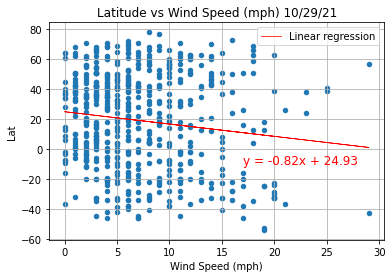

In [18]:
clean_city_data.plot(kind = "scatter",                                               
                    x = 'Wind Speed (mph)',
                    y = "Lat",
                    grid = True,
                    title = "Latitude vs Wind Speed (mph) 10/29/21"
                   )

my_linear_regression(clean_city_data['Wind Speed (mph)'], clean_city_data['Lat'], 17, -10)
plt.savefig('output_data/Latitude_vs_WindSpeed_regress.png')

## Linear Regression

In [14]:
#Creating dataframes for the different hemispheres

northern_hemi_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
southern_hemi_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86


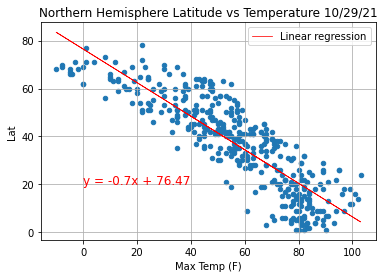

In [19]:
northern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Max Temp (F)',
                    y = "Lat",
                    grid = True,
                    title = "Northern Hemisphere Latitude vs Temperature 10/29/21"
                   )

my_linear_regression(northern_hemi_df['Max Temp (F)'], northern_hemi_df['Lat'], 0, 20)
plt.savefig('output_data/NH_Latitude_vs_Temperature_regress.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.76


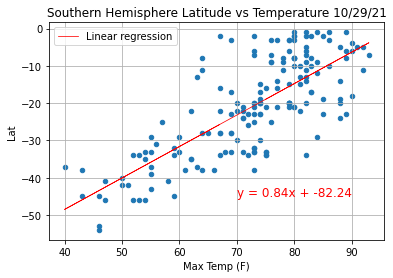

In [20]:
southern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Max Temp (F)',
                    y = "Lat",
                    grid = True,
                    title = "Southern Hemisphere Latitude vs Temperature 10/29/21"
                   )

my_linear_regression(southern_hemi_df['Max Temp (F)'], southern_hemi_df['Lat'], 70, -45)
plt.savefig('output_data/SH_Latitude_vs_Temperature_regress.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31


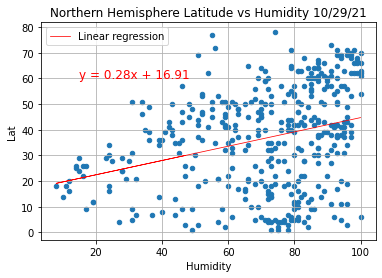

In [21]:
northern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Humidity',
                    y = "Lat",
                    grid = True,
                    title = "Northern Hemisphere Latitude vs Humidity 10/29/21"
                   )

my_linear_regression(northern_hemi_df['Humidity'], northern_hemi_df['Lat'], 15, 60)
plt.savefig('output_data/NH_Latitude_vs_Humidity_regress.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


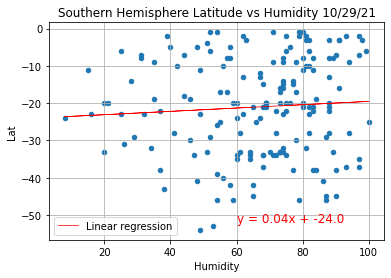

In [22]:
southern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Humidity',
                    y = "Lat",
                    grid = True,
                    title = "Southern Hemisphere Latitude vs Humidity 10/29/21"
                   )

my_linear_regression(southern_hemi_df['Humidity'], southern_hemi_df['Lat'], 60, -52)
plt.savefig('output_data/SH_Latitude_vs_Humidity_regress.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


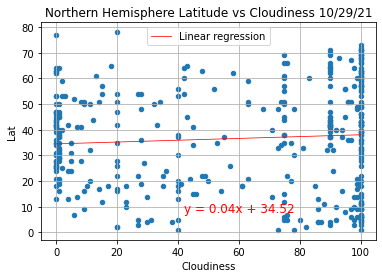

In [23]:
northern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Cloudiness',
                    y = "Lat",
                    grid = True,
                    title = "Northern Hemisphere Latitude vs Cloudiness 10/29/21"
                   )

my_linear_regression(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'], 42, 8)
plt.savefig('output_data/NH_Latitude_vs_Cloudiness_regress.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.21


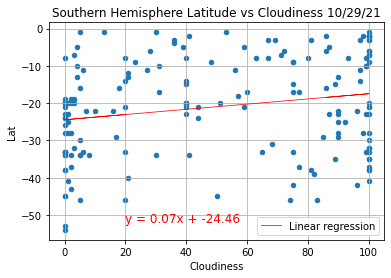

In [24]:
southern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Cloudiness',
                    y = "Lat",
                    grid = True,
                    title = "Southern Hemisphere Latitude vs Cloudiness 10/29/21"
                   )

my_linear_regression(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'], 20, -52)
plt.savefig('output_data/SH_Latitude_vs_Cloudiness_regress.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.11


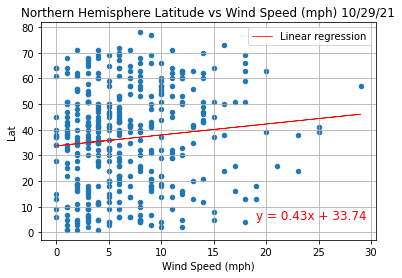

In [25]:
northern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Wind Speed (mph)',
                    y = "Lat",
                    grid = True,
                    title = "Northern Hemisphere Latitude vs Wind Speed (mph) 10/29/21"
                   )

my_linear_regression(northern_hemi_df['Wind Speed (mph)'], northern_hemi_df['Lat'], 19, 5)
plt.savefig('output_data/NH_Latitude_vs_WindSpeed_regress.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.35


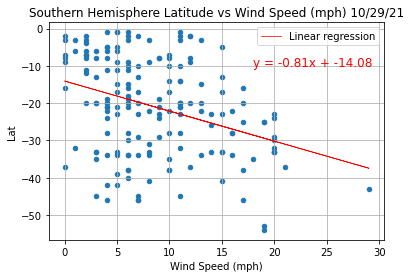

In [26]:
southern_hemi_df.plot(kind = "scatter",                                               
                    x = 'Wind Speed (mph)',
                    y = "Lat",
                    grid = True,
                    title = "Southern Hemisphere Latitude vs Wind Speed (mph) 10/29/21"
                   )

my_linear_regression(southern_hemi_df['Wind Speed (mph)'], southern_hemi_df['Lat'], 18, -10)
plt.savefig('output_data/SH_Latitude_vs_WindSpeed_regress.png')